In [2]:
GPT_CONFIG_124M = {
"vocab_size": 50257, # Vocabulary size
"context_length": 1024, # Context length
"emb_dim": 768, # Embedding dimension
"n_heads": 12, # Number of attention heads
"n_layers": 12, # Number of layers
"drop_rate": 0.1, # Dropout rate
"qkv_bias": False # Query-Key-Value bias
}

In [3]:
import torch
import torch.nn as nn
class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
        *[DummyTransformerBlock(cfg)
        for _ in range(cfg["n_layers"])]
        )
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
        cfg["emb_dim"], cfg["vocab_size"], bias=False
        )
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(
        torch.arange(seq_len, device=in_idx.device)
        )
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits
class DummyTransformerBlock(nn.Module):

    def __init__(self, cfg):
        super().__init__()
    def forward(self, x):
        return x
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
    def forward(self, x):
        return x

The DummyGPTModel class in this code defines a simplified version of a GPT-like
model using PyTorch’s neural network module (nn.Module). The model architecture
in the DummyGPTModel class consists of token and positional embeddings, dropout,a series of transformer blocks (DummyTransformerBlock), a final layer normalization(DummyLayerNorm), and a linear output layer (out_head). The configuration ispassed in via a Python dictionary, for instance, the GPT_CONFIG_124M dictionary we created earlier.

 
 
The forward method describes the data flow through the model: it computes token
and positional embeddings for the input indices, applies dropout, processes the datathrough the transformer blocks, applies normalization, and finally produces logits with the linear output layer

In [4]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [5]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


Let’s now implement layer normalization to improve the stability and efficiency of neu-
ral network training. The main idea behind layer normalization is to adjust the activa-
tions (outputs) of a neural network layer to have a mean of 0 and a variance of 1, also
known as unit variance. 

In [6]:
torch.manual_seed(123)
batch_example= torch.randn(2,5)
layer = nn.Sequential(nn.Linear(5,10),nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.4597, 0.5231, 0.0000, 0.0000, 0.1215, 0.0000, 0.1660, 0.0000, 0.4517,
         0.1732],
        [0.4471, 0.4156, 0.0000, 0.0000, 0.5732, 0.1271, 0.1047, 0.0000, 0.0000,
         0.2937]], grad_fn=<ReluBackward0>)


This code is creating and using a simple **neural network layer** in PyTorch. Let’s break it down step by step in an easy way:  

---

### **1. Setting a Random Seed**
```python
torch.manual_seed(123)
```
- This makes sure that every time we run the code, we get the same random numbers.  
- It is useful for reproducibility (so results don’t change every time you run the code).  

---

### **2. Creating a Random Input Batch**
```python
batch_example = torch.randn(2, 5)
```
- `torch.randn(2, 5)` creates a **2×5 matrix** filled with random numbers from a normal distribution.  
- This represents a **batch** of 2 samples, each having **5 features**.  
- Example (random numbers will be different):  
  ```
  [[ 1.23, -0.45,  0.67, -1.09,  0.82],
   [-0.67,  1.45, -0.89,  0.33, -0.76]]
  ```

---

### **3. Creating a Simple Neural Network Layer**
```python
layer = nn.Sequential(nn.Linear(5, 10), nn.ReLU())
```
- `nn.Sequential(...)` stacks layers together. Here, we have:  
  1. `nn.Linear(5, 10)`:  
     - A **fully connected (linear) layer** that takes 5 input values and produces 10 output values.  
     - It does this by multiplying the input by a **weight matrix** and adding a **bias**.  
  2. `nn.ReLU()`:  
     - A **ReLU (Rectified Linear Unit) activation function**, which replaces all negative values with **0**.  
     - It helps the model learn **non-linear patterns**.  

---

### **4. Passing Data Through the Layer**
```python
out = layer(batch_example)
```
- The `batch_example` (which has a shape of **(2,5)**) is passed through the `layer`.  
- The **linear layer** transforms it into a shape of **(2,10)** (since it outputs 10 values).  
- The **ReLU activation** sets all negative values to zero.  

---

### **5. Printing the Output**
```python
print(out)
```
- The final output is a **2×10 matrix** with transformed values.  
- Example output (values will be different due to randomness):  
  ```
  tensor([[0.54, 0.00, 1.23, 0.00, 0.98, 0.00, 0.00, 0.76, 0.00, 0.12],
          [0.00, 0.67, 0.00, 0.89, 0.00, 0.34, 1.45, 0.00, 0.98, 0.00]])
  ```
- Notice how some values are **zero** because of the **ReLU activation function**.

---

### **Final Summary**
- We created **random input data** (2 samples, each with 5 features).  
- We defined a **simple neural network layer** (Linear transformation + ReLU activation).  
- We passed the input through this layer, getting a **transformed output**.  
- The output is a **2×10 matrix**, where some values are set to **zero** by ReLU.  

This is a small part of how deep learning models work! 🚀

In [7]:
mean = out.mean(dim = 1 , keepdim= True)
var =  out.var(dim = 1 , keepdim = True)
print("Mean : ", mean)
print("Varienace : ", var)


Mean :  tensor([[0.1895],
        [0.1961]], grad_fn=<MeanBackward1>)
Varienace :  tensor([[0.0447],
        [0.0478]], grad_fn=<VarBackward0>)


In [8]:
out_norm = (out - mean)/torch.sqrt(var)
mean = out_norm.mean(dim = -1, keepdim = True)
var = out_norm.var(dim = -1, keepdim = True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 1.2783,  1.5781, -0.8966, -0.8966, -0.3217, -0.8966, -0.1114, -0.8966,
          1.2404, -0.0774],
        [ 1.1482,  1.0041, -0.8975, -0.8975,  1.7255, -0.3157, -0.4186, -0.8975,
         -0.8975,  0.4465]], grad_fn=<DivBackward0>)
Mean:
 tensor([[ 5.9605e-08],
        [-2.3842e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [9]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
    def forward(self,x):
        mean = x.mean(dim = -1, keepdim = True)
        var = x.var(dim = -1, keepdim = True)
        norm_x=(x-mean)/ torch.sqrt(var+self.eps)
        return norm_x*self.scale+self.shift
    

This specific implementation of layer normalization operates on the last dimension of the input tensor x, which represents the embedding dimension (emb_dim). 

The vari-able eps is a small constant (epsilon) added to the variance to prevent division by zeroduring normalization. 


The scale and shift are two trainable parameters (of thesame dimension as the input) that the LLM automatically adjusts during training if it
is determined that doing so would improve the model’s performance on its training
task.

 This allows the model to learn appropriate scaling and shifting that best suit thedata it is processing.

This code defines a **custom Layer Normalization (LayerNorm) module** in PyTorch. Let’s break it down step by step in simple terms.

---

## **1. What is Layer Normalization?**
Layer Normalization is a technique that **normalizes** the inputs across their features. This helps stabilize and speed up training in deep learning models.

---

## **2. Breaking Down the Code**
### **Step 1: Creating a Custom Neural Network Module**
```python
class LayerNorm(nn.Module):
```
- This defines a new class called `LayerNorm`, which is a custom **neural network layer**.  
- It **inherits** from `nn.Module`, which is the base class for all PyTorch models.

---

### **Step 2: Initializing the Layer**
```python
def __init__(self, emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))
```
- This is the **constructor** (`__init__` method), which runs when we create a `LayerNorm` object.
- **`emb_dim`** is the number of input features (i.e., how many values each input has).  
- **`self.eps = 1e-5`**:  
  - A small constant added to prevent division by zero.  
- **`self.scale` and `self.shift`**:  
  - These are **trainable parameters** that allow the model to adjust the normalization.  
  - `scale` (γ) starts as **ones** (so it doesn’t change the input initially).  
  - `shift` (β) starts as **zeros** (so it doesn’t add any offset initially).  
  - `nn.Parameter(...)` makes them **learnable** during training.

> **⚠️ Mistake:** The `__init__` method is missing a `_` in `__init(self, emb_dim)`. It should be `__init__(self, emb_dim)`.

---

### **Step 3: Forward Pass (Applying Layer Normalization)**
```python
def forward(self, x):
    mean = x.mean(dim=-1, keepdim=True)
    var = x.var(dim=-1, keepdim=True)
    norm_x = (x - mean) / torch.sqrt(var + self.eps)
    return norm_x * self.scale + self.shift
```
This method defines how the input `x` is transformed when passed through the layer.  

#### **Breaking it down:**
1. **Compute the Mean:**
   ```python
   mean = x.mean(dim=-1, keepdim=True)
   ```
   - Calculates the **mean** of `x` along the last dimension (`dim=-1`).
   - `keepdim=True` ensures that the result has the same shape as `x`, making broadcasting easier.

2. **Compute the Variance:**
   ```python
   var = x.var(dim=-1, keepdim=True)
   ```
   - Calculates the **variance** of `x` along the last dimension.

3. **Normalize the Input:**
   ```python
   norm_x = (x - mean) / torch.sqrt(var + self.eps)
   ```
   - Subtracts the mean and divides by the **standard deviation** (`sqrt(variance)`).
   - This **scales** the data so that it has a mean of 0 and a variance of 1.

4. **Apply Learnable Parameters (Scale and Shift):**
   ```python
   return norm_x * self.scale + self.shift
   ```
   - Multiplies by `self.scale` (γ) and adds `self.shift` (β).
   - This allows the network to **adjust the normalization** during training.

---

## **3. Summary**
🔹 **What does this LayerNorm class do?**
- Normalizes each sample **independently** across its features.  
- Ensures a mean of **0** and variance of **1**.  
- Uses **trainable parameters** (`scale` and `shift`) to allow flexibility.  

🔹 **Why use Layer Normalization?**
- It helps **stabilize** training, especially in **transformers** and recurrent networks.  
- Unlike **BatchNorm**, it does **not** depend on batch size (so it works well in small batches).  

This is a simplified version of PyTorch’s built-in `nn.LayerNorm`! 🚀

GELU Activation function

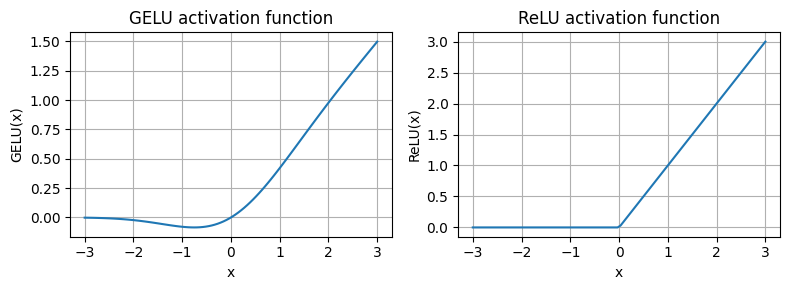

In [10]:
class GELU(nn.Module):
    def forward(self,x):
        return 0.5*0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2.0 / torch.pi)) *(x + 0.044715 * torch.pow(x, 3))))

import matplotlib.pyplot as plt
gelu, relu = GELU(), nn.ReLU()
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)
plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )
    def forward(self,x):
        return self.layers(x)

Let's break down the provided code step by step to understand its components and functionality:

```python
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )
    def forward(self, x):
        return self.layers(x)
```

1. **Defining the `FeedForward` Class**:
   - `class FeedForward(nn.Module):`
     - This line defines a new class named `FeedForward` that inherits from `nn.Module`, which is the base class for all neural network modules in PyTorch. Inheriting from `nn.Module` allows us to leverage PyTorch's built-in functionalities for neural networks.

2. **Initialization Method (`__init__`)**:
   - `def __init__(self, cfg):`
     - This is the constructor method that initializes the `FeedForward` class. It takes `cfg` as an argument, which is expected to be a dictionary containing configuration parameters.

   - `super().__init__()`
     - This line calls the constructor of the parent class (`nn.Module`) to ensure that the base class is properly initialized.

   - `self.layers = nn.Sequential(...)`
     - Here, we define a sequence of layers using `nn.Sequential`, which is a container module that processes inputs through a sequence of sub-modules in the order they are added.

3. **Defining the Sequential Layers**:
   - `nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),`
     - This creates a linear (fully connected) layer that takes an input of size `cfg["emb_dim"]` and outputs a tensor of size `4 * cfg["emb_dim"]`. The `nn.Linear` module applies a linear transformation to the incoming data.

   - `GELU(),`
     - This applies the Gaussian Error Linear Unit (GELU) activation function, which is commonly used in transformer models. The GELU activation function is defined as:

       \[ \text{GELU}(x) = x \cdot \Phi(x) \]

       where \( \Phi(x) \) is the cumulative distribution function of the standard normal distribution.

   - `nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),`
     - This adds another linear layer that reduces the dimensionality back from `4 * cfg["emb_dim"]` to `cfg["emb_dim"]`.

4. **Forward Method**:
   - `def forward(self, x):`
     - This method defines the forward pass of the network. It takes an input tensor `x` and passes it through the sequence of layers defined in `self.layers`.

   - `return self.layers(x)`
     - This line applies the sequential layers to the input `x` and returns the output.

**Summary**:
The `FeedForward` class represents a feedforward neural network module commonly used in transformer architectures. It consists of two linear transformations with a GELU activation function in between. The first linear layer expands the input dimensionality by a factor of four, the GELU activation introduces non-linearity, and the second linear layer projects the dimensionality back to its original size. This structure allows the model to learn complex representations and is a standard component in transformer-based models. 

In [12]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


In [15]:
class ShortcutConnection(nn.Module):
    def __init__(self,layer_size,use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_size[0] , layer_size[1]),
                         GELU() ),
             nn.Sequential(nn.Linear(layer_size[0] , layer_size[1]),
                         GELU() ),
             nn.Sequential(nn.Linear(layer_size[0] , layer_size[1]),
                         GELU() ),
             nn.Sequential(nn.Linear(layer_size[0] , layer_size[1]),
                         GELU() ),
        ])
    def forward(self,x):
            for layer in self.layers:
                layer_output = layer(x)
                if self.use_shortcut and x.shape == layer_output.shape:
                    x = x + layer_output
                else:
                    x = layer_output
            return x




In [16]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123)
model_without_shortcut = ShortcutConnection(
layer_sizes, use_shortcut=False
)


def print_gradients(model, x):
    output = model(x)
    target = torch.tensor([[0.]])
    loss = nn.MSELoss()
    loss = loss(output, target)
    loss.backward()
    for name, param in model.named_parameters():
        if 'weight' in name:
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")


torch.manual_seed(123)
model_with_shortcut = ShortcutConnection(
layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.10845032334327698
layers.1.0.weight has gradient mean of 0.07727959007024765
layers.2.0.weight has gradient mean of 0.126175656914711
layers.3.0.weight has gradient mean of 0.1201065257191658


C:\Users\ashmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [41]:
class MulatHeadAttention(nn.Module):
    def __init__(self, d_in, d_out,context_length , dropout, num_heads, qkv_bias = False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads 
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask' , torch.triu(torch.ones(context_length, context_length), diagonal=1))
    def forward(self , x):
        b, num_tokens,d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        keys = keys.view(b, num_tokens,self.num_heads,self.head_dim)
        values = values.view(b, num_tokens,self.num_heads,self.head_dim)
        queries = queries.view(b, num_tokens,self.num_heads,self.head_dim)
        keys = keys.transpose(1,2)
        queries = queries.transpose(1,2)
        values = values.transpose(1,2)
        attn_scores = queries @ keys.transpose(-2,-1)
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        context_vec= (attn_weights@values).transpose(1,2)
        contex_vec  = context_vec.contigious().view(b, num_tokens,self.d_out)
        contex_vec= contex_vec.out_proj(contex_vec)
        return contex_vec


In [42]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MulatHeadAttention(
             d_in=cfg["emb_dim"],
             d_out=cfg["emb_dim"],
             context_length=cfg["context_length"],
             num_heads=cfg["n_heads"],
             dropout=cfg["drop_rate"],
             qkv_bias=cfg["qkv_bias"] 
        )
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])
    def forward(self,x):
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x + shortcut
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut
        return x



In [43]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768)
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)

AttributeError: 'Tensor' object has no attribute 'contigious'